Первые 20 строк:
    user_id    age country  purchases  revenue
0         1   25.0      FR          7      749
1         2   24.0      RU          5     1115
2         3   52.0      FR          7      399
3         4   31.0      RU          6      654
4         5    NaN      DE          6     1296
5         6  120.0      FR         -1      785
6         7   46.0      RU          0        0
7         8   28.0      CN          2      456
8         9   39.0      US          4      980
9        10   24.0      RU          7      511
10       11   24.0      US          4        0
11       12   20.0      CN          7     1652
12       13    NaN      US          9      630
13       14   36.0      DE          9     2358
14       15   57.0      FR          7      693
15       16   22.0      FR          3      183
16       17   32.0      FR          6     1608
17       18   24.0      RU          0        0
18       19   47.0      RU          3      432
19       20   31.0      RU          2      

C:\Users\lesas\AppData\Local\Temp\ipykernel_25604\3527241606.py:84: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_stats = df.groupby('age_group').agg({


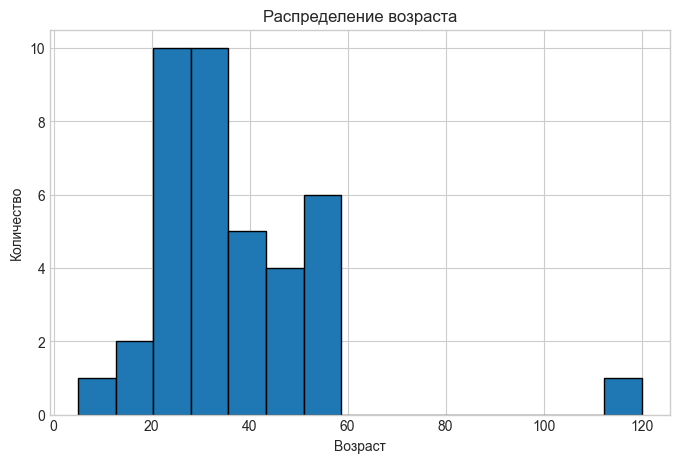

<Figure size 800x500 with 0 Axes>

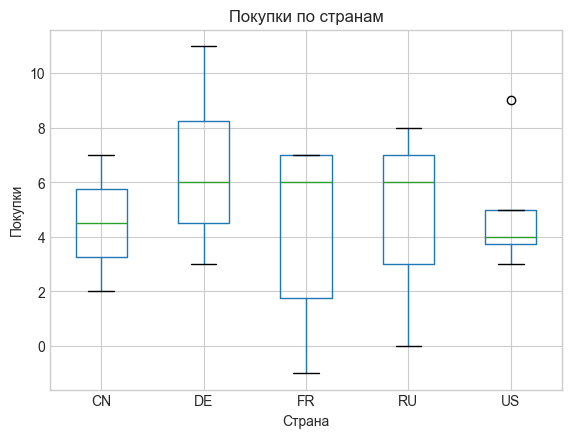

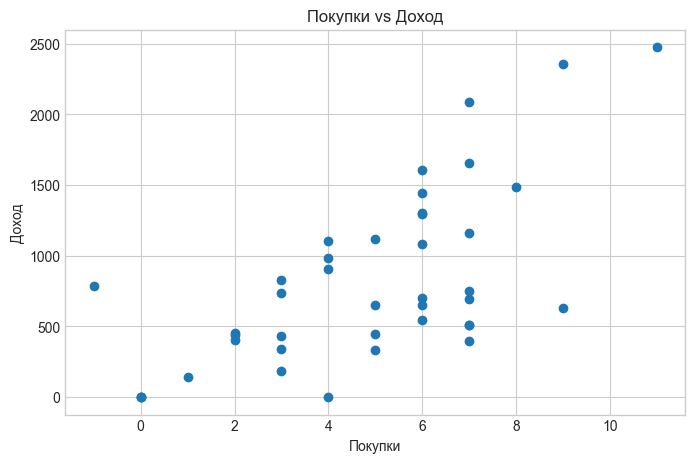

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
url = r"D:\GitHub\AI_-ourse_mirea\homeworks\HW02\dataset\S02-hw-dataset.csv"

df = pd.read_csv(url, sep=',')
print("Первые 20 строк:")
print(df.head(n = 20))
print("Информация о датасете:")
print(df.info())
print('Базовые описательные статистики:')
print(df.describe(include='all'))
print("=== Анализ пропусков ===")
missing_data = df.isna().sum()
missing_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Количество пропусков': missing_data,
    'Процент пропусков': missing_percent
})
print("Статистика пропусков по столбцам:")
print(missing_df)


print("\nАНАЛИЗ ДУБЛИКАТОВ")

full_duplicates = df.duplicated().sum()
print(f"Полных дубликатов строк: {full_duplicates}")

if full_duplicates > 0:
    print("Дублирующиеся строки:")
    print(df[df.duplicated(keep=False)])

#Проверка подозрительных значений
print("\nПРОВЕРКА ПОДОЗРИТЕЛЬНЫХ ЗНАЧЕНИЙ")

# Возраст
print("\nВозраст:")
age_issues = df[(df['age'] < 0) | (df['age'] > 100)]
print(f"  Нереалистичный возраст (<0 или >100): {len(age_issues)}")
if len(age_issues) > 0:
    print(age_issues[['user_id', 'age']])

# Покупки
print("\nПокупки:")
negative_purchases = df[df['purchases'] < 0]
print(f"  Отрицательные покупки: {len(negative_purchases)}")
if len(negative_purchases) > 0:
    print(negative_purchases[['user_id', 'purchases']])

# Логические несоответствия
print("\nЛогические проверки:")
zero_purchases_revenue = df[(df['purchases'] == 0) & (df['revenue'] > 0)]
zero_revenue_purchases = df[(df['revenue'] == 0) & (df['purchases'] > 0)]

print(f"  Покупок=0, но доход>0: {len(zero_purchases_revenue)}")
print(f"  Покупок>0, но доход=0: {len(zero_revenue_purchases)}")

#Базовый EDA
print("/nБАЗОВЫЙ EDA")
# Распределение по странам
print("\n1. РАСПРЕДЕЛЕНИЕ ПО СТРАНАМ:")
country_stats = df['country'].value_counts()
print(country_stats)

print("\nВ процентах:")
print((country_stats / len(df) * 100).round(3))

# Группировка по странам
print("\n СТАТИСТИКИ ПО СТРАНАМ:")
grouped = df.groupby('country').agg({
    'age': ['mean', 'median', 'count'],
    'purchases': ['mean', 'sum'],
    'revenue': ['mean', 'sum']
}).round(3)

print(grouped)

# Возрастные группы
print("\n АНАЛИЗ ПО ВОЗРАСТНЫМ ГРУППАМ:")

df['age_group'] = pd.cut(df['age'], 
                         bins=[0, 18, 25, 35, 50, 100],
                         labels=['<18', '18-25', '26-35', '36-50', '>50'])

age_group_stats = df.groupby('age_group').agg({
    'user_id': 'count',
    'purchases': 'mean',
    'revenue': 'mean'
}).round(3)

print(age_group_stats)

#Графики
print("\nГРАФИКИ ")

# Гистограмма возраста
plt.figure(figsize=(8, 5))
plt.hist(df['age'].dropna(), bins=15, edgecolor='black')
plt.title('Распределение возраста')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.grid(True)
# Сохраняем гистограмму возраста
plt.savefig('figures/age_distribution.png', dpi=300, bbox_inches='tight')
plt.show()


#  Боксплот покупок по странам
plt.figure(figsize=(8, 5))
df.boxplot(column='purchases', by='country')
plt.title('Покупки по странам')
plt.suptitle('')
plt.xlabel('Страна')
plt.ylabel('Покупки')
plt.grid(True)
#Сохраняем боксплот
plt.savefig('figures/Buys_by_country.png', dpi=300, bbox_inches='tight')
plt.show()


# Scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(df['purchases'], df['revenue'])
plt.title('Покупки vs Доход')
plt.xlabel('Покупки')
plt.ylabel('Доход')
plt.grid(True)
# Сохраняем scatter plot
plt.savefig('figures/Buys_vs_income.png', dpi=300, bbox_inches='tight')
plt.show()
